In [2]:
import numpy
import pandas
import matplotlib
import PIL

print("Libraries loaded successfully")


Libraries loaded successfully


In [3]:
import os
from pathlib import Path
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image


In [8]:
import os
print(os.getcwd())


/content


In [9]:
import platform
print(platform.system())


Linux


In [10]:
from google.colab import files
uploaded = files.upload()


Saving archive (10).zip to archive (10).zip


In [11]:
import os
print(os.listdir())


['.config', 'archive (10).zip', 'sample_data']


In [12]:
import zipfile

zip_path = "archive (10).zip"  # change to your uploaded zip file name
extract_dir = "kneeoa_data"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_dir)

print("Extracted to:", extract_dir)


Extracted to: kneeoa_data


In [13]:
from pathlib import Path
DATA_DIR = Path("kneeoa_data")  # if the extracted folder contains train/val/test
print(DATA_DIR.exists())
print([p.name for p in DATA_DIR.iterdir()])


True
['val', 'train', 'auto_test', 'test']


In [14]:
from pathlib import Path
import pandas as pd

IMG_EXTS = {".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff"}

splits = ["train", "val", "test"]

rows = []

for split in splits:
    split_dir = DATA_DIR / split

    for label_dir in split_dir.iterdir():
        if label_dir.is_dir():
            label = int(label_dir.name)

            for img_path in label_dir.rglob("*"):
                if img_path.suffix.lower() in IMG_EXTS:
                    rows.append({
                        "path": str(img_path),
                        "label": label,
                        "split": split
                    })

df = pd.DataFrame(rows)

print("Total images:", len(df))
df.head()


Total images: 8260


,path,label,split
0,kneeoa_data/train/2/9297051R.png,2,train
1,kneeoa_data/train/2/9022789R.png,2,train
2,kneeoa_data/train/2/9176086R.png,2,train
3,kneeoa_data/train/2/9951312L.png,2,train
4,kneeoa_data/train/2/9902900L.png,2,train


In [15]:
df.groupby(["split","label"]).size()


split  label
test   0         639
       1         296
       2         447
       3         223
       4          51
train  0        2286
       1        1046
       2        1516
       3         757
       4         173
val    0         328
       1         153
       2         212
       3         106
       4          27
dtype: int64

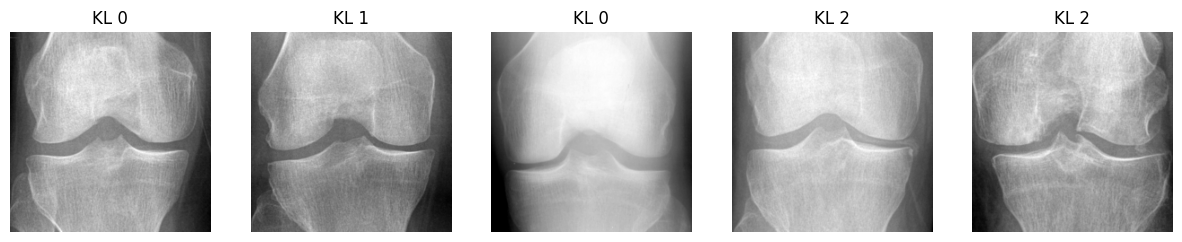

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import random

def show_images(df, split="train", n=5):
    subset = df[df["split"]==split]

    plt.figure(figsize=(15,6))

    for i, row in enumerate(subset.sample(n).itertuples()):
        img = Image.open(row.path)
        plt.subplot(1,n,i+1)
        plt.imshow(img, cmap="gray")
        plt.title(f"KL {row.label}")
        plt.axis("off")

    plt.show()

show_images(df, "train", 5)
